# OBJECT DETECTION USING OPENCV Vs code code

In [ ]:
#OBJECT DETECTION USING OPENCV

#I have 3 object with me 1> red 2> green 3> blue

'''How can we detect which color it is and how can way say to the computer only 1 specific color
that is what we are going to see using opencv'''

import cv2 # package of AI
import numpy as np

#Lets capture the camera. 0 for webcam. if you want other webcam then we can change to index to 1, 2
cap = cv2.VideoCapture(0)

#Lets load the frame
while True:
    _, frame = cap.read()

    #we convert this format to hsv , bgr library this is color format red, green, blue, we are frame with hsv which use to select the color

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Lets frame on the windows
    cv2.imshow("Frame", frame)

# weight key event which is 1 and which is 27 then break the loop that means we are going to stop the loop
    key = cv2.waitKey(1)
    if key == 27:
        break

# Lets run this one and we will see the camera, camera is on

# Now lets deeper understanding how to detect color now

''' HSV --> HUE - we can see the color red,green,blue,yellow and also we can see the gradiation of the color
          SATURATION - How much quantity of the color we want to have
          (0- nothing, completely white, opencv - maximux pixel 0-255)
          VALUE - Brightness of the color (0- completely black)'''
#===========
#Next step is to convert the color format to hsv


# OBJECT DETECTION USING OPENCV google collab code

<IPython.core.display.Javascript object>

Photo captured successfully!


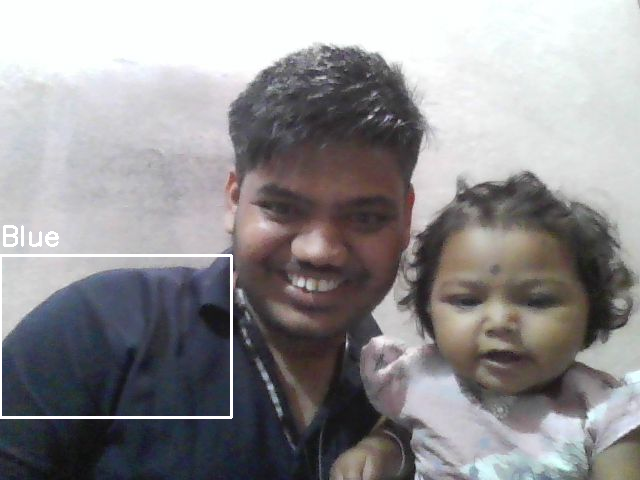

In [7]:
# ===========================================
# OBJECT DETECTION USING OPENCV (GOOGLE COLAB)
# Detect Red, Green, Blue objects using webcam
# ===========================================

# Install required packages
!pip install opencv-python-headless mediapipe

import cv2
import numpy as np
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL.Image
import io

# ===========================================
# Helper function to access webcam in Colab
# ===========================================
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture button
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ===========================================
# Capture image from webcam
# ===========================================
try:
    filename = take_photo()
    print("Photo captured successfully!")
except Exception as e:
    print("Error accessing webcam:", str(e))

# ===========================================
# Process the captured image with OpenCV
# ===========================================
frame = cv2.imread(filename)

# Convert BGR to HSV
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define color ranges (HSV)
# Red has 2 ranges because it wraps around hue=0
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([36, 50, 70])
upper_green = np.array([89, 255, 255])

lower_blue = np.array([90, 50, 70])
upper_blue = np.array([128, 255, 255])

# Masks
red_mask1 = cv2.inRange(hsv_frame, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_frame, lower_red2, upper_red2)
red_mask = red_mask1 + red_mask2

green_mask = cv2.inRange(hsv_frame, lower_green, upper_green)
blue_mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)

# Detect colors
colors = {"Red": red_mask, "Green": green_mask, "Blue": blue_mask}
for color, mask in colors.items():
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # filter small noises
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 2)
            cv2.putText(frame, color, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (255, 255, 255), 2)

# Show final result
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(frame_rgb)


# OBJECT DETECTION USING OPENCV --> Red color detection vs code code

In [ ]:
#OBJECT DETECTION USING OPENCV

#I have 3 object with me 1> red 2> green 3> blue

'''How can we detect which color it is and how can way say to the computer only 1 specific color
that is what we are going to see using opencv'''

import cv2 # package of AI
import numpy as np

#Lets capture the camera. 0 for webcam. if you want other webcam then we can change to index to 1, 2
cap = cv2.VideoCapture(0)

#Lets load the frame
while True:
    _, frame = cap.read()

    #we convert this format to hsv , bgr library this is color format red, green, blue, we are frame with hsv which use to select the color

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Red color
    low_red = np.array([161, 155, 84])
    high_red = np.array([179,255,255])

    # Red color
    red_mask = cv2.inRange(hsv_frame)
    red = cv2.bitwise_and(frame, frame, mask=red_mask)

    cv2.imshow('Frame', frame)
    cv2.imshow('Red', red)

# Lets frame on the windows
    cv2.imshow("Frame", frame)

# weight key event which is 1 and which is 27 then break the loop that means we are going to stop the loop
    key = cv2.waitKey(1)
    if key == 27:
        break

# Lets run this one and we will see the camera, camera is on

# Now lets deeper understanding how to detect color now

''' HSV --> HUE - we can see the color red,green,blue,yellow and also we can see the gradiation of the color
          SATURATION - How much quantity of the color we want to have
          (0- nothing, completely white, opencv - maximux pixel 0-255)
          VALUE - Brightness of the color (0- completely black)'''
#===========
#Next step is to convert the color format to hsv


#OBJECT DETECTION USING OPENCV --> Red color detection collab code

<IPython.core.display.Javascript object>

✅ Photo captured successfully!


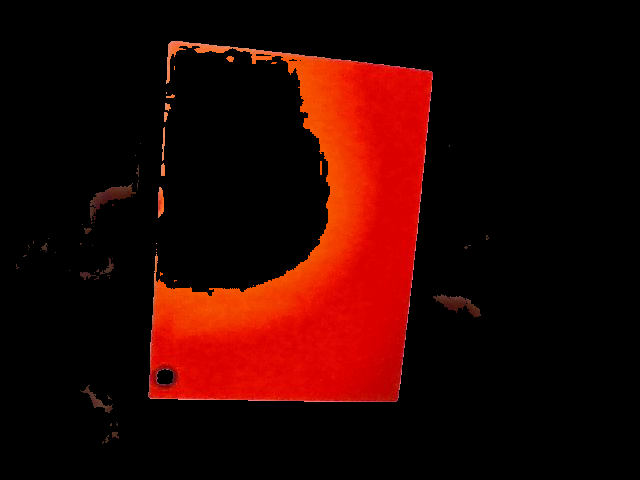

In [12]:
# ==============================
# RED COLOR DETECTION (COLAB)
# ==============================

# Install required packages
!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image

# ------------------------------
# Helper function: Capture Image
# ------------------------------
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for Capture button click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ------------------------------
# Capture Image
# ------------------------------
try:
    filename = take_photo()
    print("✅ Photo captured successfully!")
except Exception as e:
    print("❌ ERROR:", str(e))

# ------------------------------
# Detect ONLY Red Color
# ------------------------------
frame = cv2.imread(filename)
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define Red color range
low_red1 = np.array([0, 120, 70])
high_red1 = np.array([10, 255, 255])
low_red2 = np.array([170, 120, 70])
high_red2 = np.array([180, 255, 255])

# Create mask (red wraps around hue)
red_mask1 = cv2.inRange(hsv_frame, low_red1, high_red1)
red_mask2 = cv2.inRange(hsv_frame, low_red2, high_red2)
red_mask = red_mask1 + red_mask2

# Apply mask
red_detected = cv2.bitwise_and(frame, frame, mask=red_mask)

# Convert to RGB (for Colab display)
frame_rgb = cv2.cvtColor(red_detected, cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(frame_rgb)


# OBJECT DETECTION USING OPENCV --> Blue color detection vs code code

In [ ]:
#OBJECT DETECTION USING OPENCV

#I have 3 object with me 1> red 2> green 3> blue

'''How can we detect which color it is and how can way say to the computer only 1 specific color
that is what we are going to see using opencv'''

import cv2 # package of AI
import numpy as np

#Lets capture the camera. 0 for webcam. if you want other webcam then we can change to index to 1, 2
cap = cv2.VideoCapture(0)

#Lets load the frame
while True:
    _, frame = cap.read()

    #we convert this format to hsv , bgr library this is color format red, green, blue, we are frame with hsv which use to select the color

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Red color
    low_blue = np.array([94, 80, 2])
    high_red = np.array([126,255,255])

    # Blue color
    blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
    blue = cv2.bitwise_and(frame, frame, mask=blue_mask)

    cv2.imshow('Frame', frame)
    cv2.imshow('Blue', blue)
    red = cv2.bitwise_and(frame, frame, mask=red_mask)

    cv2.imshow('Frame', frame)
    cv2.imshow('Blue', blue)

# Lets frame on the windows
    cv2.imshow("Frame", frame)

# weight key event which is 1 and which is 27 then break the loop that means we are going to stop the loop
    key = cv2.waitKey(1)
    if key == 27:
        break

# Lets run this one and we will see the camera, camera is on

# Now lets deeper understanding how to detect color now

''' HSV --> HUE - we can see the color red,green,blue,yellow and also we can see the gradiation of the color
          SATURATION - How much quantity of the color we want to have
          (0- nothing, completely white, opencv - maximux pixel 0-255)
          VALUE - Brightness of the color (0- completely black)'''
#===========
#Next step is to convert the color format to hsv


OBJECT DETECTION USING OPENCV --> Blue color detection google collab code

<IPython.core.display.Javascript object>

✅ Photo captured successfully!


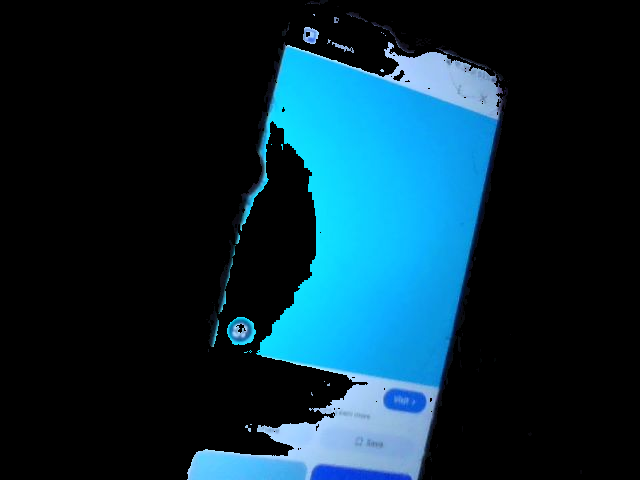

In [14]:
# ==============================
# BLUE COLOR DETECTION (COLAB)
# ==============================

!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image

# ------------------------------
# Helper function: Capture Image
# ------------------------------
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for Capture button click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ------------------------------
# Capture Image
# ------------------------------
try:
    filename = take_photo()
    print("✅ Photo captured successfully!")
except Exception as e:
    print("❌ ERROR:", str(e))

# ------------------------------
# Detect ONLY Blue Color
# ------------------------------
frame = cv2.imread(filename)
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define Blue color range in HSV
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])

# Create mask for blue
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)

# Apply mask to original image
blue_detected = cv2.bitwise_and(frame, frame, mask=blue_mask)

# Convert to RGB (for display in Colab)
frame_rgb = cv2.cvtColor(blue_detected, cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(frame_rgb)


OBJECT DETECTION USING OPENCV --> green color detection google collab code

In [ ]:
#OBJECT DETECTION USING OPENCV

#I have 3 object with me 1> red 2> green 3> blue

'''How can we detect which color it is and how can way say to the computer only 1 specific color
that is what we are going to see using opencv'''

import cv2 # package of AI
import numpy as np

#Lets capture the camera. 0 for webcam. if you want other webcam then we can change to index to 1, 2
cap = cv2.VideoCapture(0)

#Lets load the frame
while True:
    _, frame = cap.read()

    #we convert this format to hsv , bgr library this is color format red, green, blue, we are frame with hsv which use to select the color

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Red color
    low_green = np.array([40, 100, 100])
    high_red = np.array([102,255,255])

    # Green color
    green_mask = cv2.inRange(hsv_frame, low_green, high_green)
    blue = cv2.bitwise_and(frame, frame, mask=green_mask)

    cv2.imshow('Frame', frame)
    cv2.imshow('Blue', blue)
    red = cv2.bitwise_and(frame, frame, mask=red_mask)

    cv2.imshow('Frame', frame)
    cv2.imshow('green', green)

# Lets frame on the windows
    cv2.imshow("Frame", frame)

# weight key event which is 1 and which is 27 then break the loop that means we are going to stop the loop
    key = cv2.waitKey(1)
    if key == 27:
        break

# Lets run this one and we will see the camera, camera is on

# Now lets deeper understanding how to detect color now

''' HSV --> HUE - we can see the color red,green,blue,yellow and also we can see the gradiation of the color
          SATURATION - How much quantity of the color we want to have
          (0- nothing, completely white, opencv - maximux pixel 0-255)
          VALUE - Brightness of the color (0- completely black)'''
#===========
#Next step is to convert the color format to hsv


OBJECT DETECTION USING OPENCV --> Green color detection google collab code

<IPython.core.display.Javascript object>

✅ Photo captured successfully!


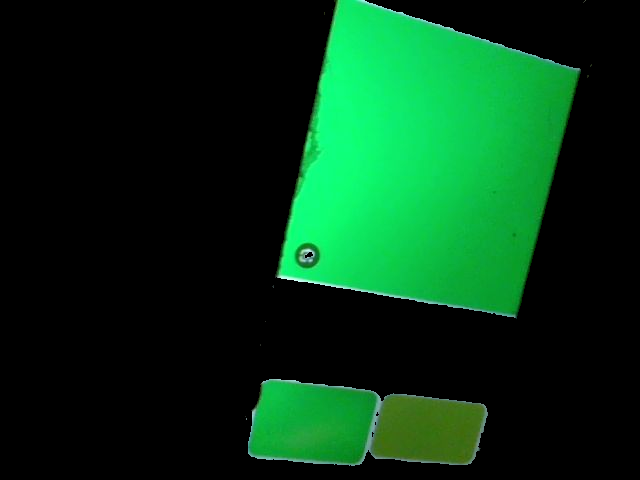

In [16]:
# ==============================
# GREEN COLOR DETECTION (COLAB)
# ==============================

!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image

# ------------------------------
# Helper function: Capture Image
# ------------------------------
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for Capture button click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ------------------------------
# Capture Image
# ------------------------------
try:
    filename = take_photo()
    print("✅ Photo captured successfully!")
except Exception as e:
    print("❌ ERROR:", str(e))

# ------------------------------
# Detect ONLY Green Color
# ------------------------------
frame = cv2.imread(filename)
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define Green color range in HSV
low_green = np.array([40, 40, 40])    # lower bound
high_green = np.array([90, 255, 255]) # upper bound

# Create mask for green
green_mask = cv2.inRange(hsv_frame, low_green, high_green)

# Apply mask
green_detected = cv2.bitwise_and(frame, frame, mask=green_mask)

# Convert to RGB for display in Colab
frame_rgb = cv2.cvtColor(green_detected, cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(frame_rgb)


Except white mask vs code code

In [ ]:
#OBJECT DETECTION USING OPENCV

#I have 3 object with me 1> red 2> green 3> blue

'''How can we detect which color it is and how can way say to the computer only 1 specific color
that is what we are going to see using opencv'''

import cv2 # package of AI
import numpy as np

#Lets capture the camera. 0 for webcam. if you want other webcam then we can change to index to 1, 2
cap = cv2.VideoCapture(0)

#Lets load the frame
while True:
    _, frame = cap.read()

    #we convert this format to hsv , bgr library this is color format red, green, blue, we are frame with hsv which use to select the color

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Red color
    low = np.array([0, 42, 0])
    high = np.array([179,255,255])

    # Green color
    mask = cv2.inRange(hsv_frame, low, high)
    result = cv2.bitwise_and(frame, frame, mask)

    cv2.imshow('Frame', frame)
    cv2.imshow('Blue', blue)
    red = cv2.bitwise_and(frame, frame, mask=red_mask)

    cv2.imshow('Frame', frame)
    cv2.imshow('green', result)

# Lets frame on the windows
    cv2.imshow("Frame", frame)

# weight key event which is 1 and which is 27 then break the loop that means we are going to stop the loop
    key = cv2.waitKey(1)
    if key == 27:
        break

# Lets run this one and we will see the camera, camera is on

# Now lets deeper understanding how to detect color now

''' HSV --> HUE - we can see the color red,green,blue,yellow and also we can see the gradiation of the color
          SATURATION - How much quantity of the color we want to have
          (0- nothing, completely white, opencv - maximux pixel 0-255)
          VALUE - Brightness of the color (0- completely black)'''
#===========
#Next step is to convert the color format to hsv


Except white mask collab code

<IPython.core.display.Javascript object>

✅ Photo captured successfully!


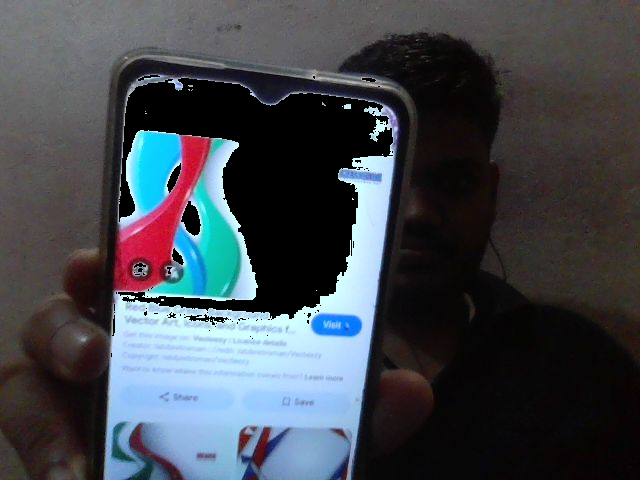

In [19]:
# ==============================
# COLOR DETECTION EXCEPT WHITE
# ==============================

!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image

# ------------------------------
# Helper function: Capture Image
# ------------------------------
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for Capture button click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ------------------------------
# Capture Image
# ------------------------------
try:
    filename = take_photo()
    print("✅ Photo captured successfully!")
except Exception as e:
    print("❌ ERROR:", str(e))

# ------------------------------
# Detect everything EXCEPT WHITE
# ------------------------------
frame = cv2.imread(filename)
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define White color range in HSV
# White = very low saturation + high value
low_white = np.array([0, 0, 200])     # lower bound
high_white = np.array([179, 40, 255]) # upper bound

# Create mask for white
white_mask = cv2.inRange(hsv_frame, low_white, high_white)

# Invert mask → this keeps everything except white
mask_not_white = cv2.bitwise_not(white_mask)

# Apply mask to original image
result = cv2.bitwise_and(frame, frame, mask=mask_not_white)

# Convert to RGB for display in Colab
frame_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(frame_rgb)


Combine all colors code in vs code

In [ ]:
#OBJECT DETECTION USING OPENCV

#I have 3 object with me 1> red 2> green 3> blue

'''How can we detect which color it is and how can way say to the computer only 1 specific color
that is what we are going to see using opencv'''

import cv2 # package of AI
import numpy as np

#Lets capture the camera. 0 for webcam. if you want other webcam then we can change to index to 1, 2
cap = cv2.VideoCapture(0)

#Lets load the frame
while True:
    _, frame = cap.read()

    #we convert this format to hsv , bgr library this is color format red, green, blue, we are frame with hsv which use to select the color

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Red color
    low_red = np.array([161, 155, 84])
    high_red = np.array([179, 255, 255])
    red_mask = cv2.inRange(hsv_frame, low_red, high_red)
    red = cv2.bitwise_and(frame, frame, mask=red_mask)
    # Blue color
    low_blue = np.array([94, 80, 2])
    high_blue = np.array([126, 255, 255])
    blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
    blue = cv2.bitwise_and(frame, frame, mask=blue_mask)
   # Green color
    low_green = np.array([0, 40, 0])    # lower bound
    high_green = np.array([179, 255, 255]) # upper bound
    green_mask = cv2.inRange(hsv_frame, low_green, high_green)
    green = cv2.bitwise_and(frame, frame, mask=green_mask)

    # Every color except white
     low = np.array([0, 42, 0])
    high = np.array([179,255,255])
    mask = cv2.inRange(hsv_frame, low, high)
    frame = cv2.bitwise_and(frame, frame, mask=mask)


    cv2.imshow('Frame', frame)
    cv2.imshow('Blue', blue)
    cv2.imshow('Green', green)
    cv2.imshow('Red', red)
    cv2.imshow('Result', result)

# Lets frame on the windows
    cv2.imshow("Frame", frame)

# weight key event which is 1 and which is 27 then break the loop that means we are going to stop the loop
    key = cv2.waitKey(1)
    if key == 27:
        break

# Lets run this one and we will see the camera, camera is on

# Now lets deeper understanding how to detect color now

''' HSV --> HUE - we can see the color red,green,blue,yellow and also we can see the gradiation of the color
          SATURATION - How much quantity of the color we want to have
          (0- nothing, completely white, opencv - maximux pixel 0-255)
          VALUE - Brightness of the color (0- completely black)'''
#===========
#Next step is to convert the color format to hsv


Combine all colors code in collab code

<IPython.core.display.Javascript object>

✅ Photo captured successfully!
📷 Original Image:


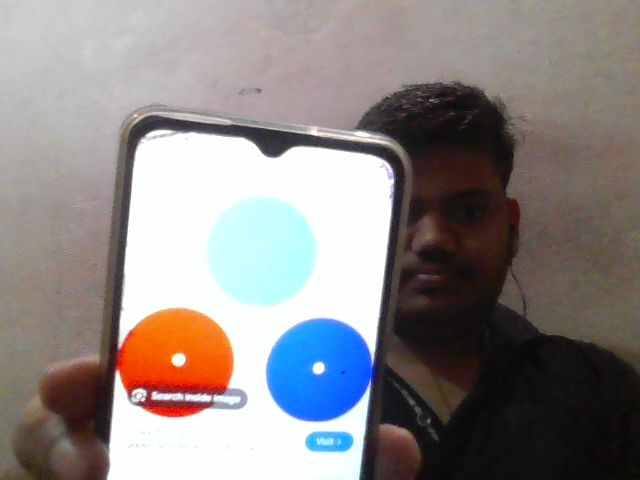

🔴 Red Objects:


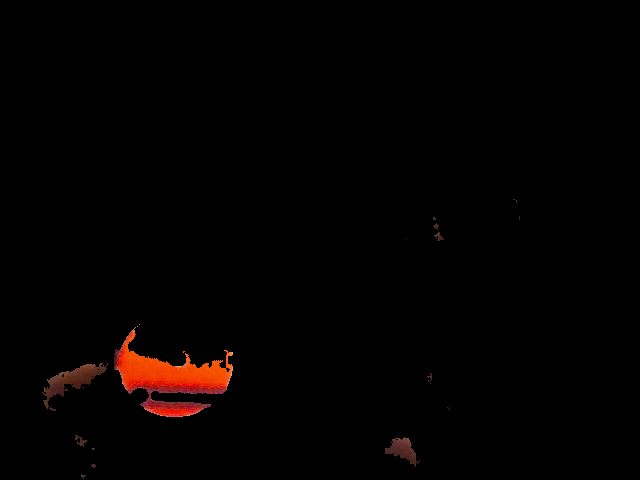

🟢 Green Objects:


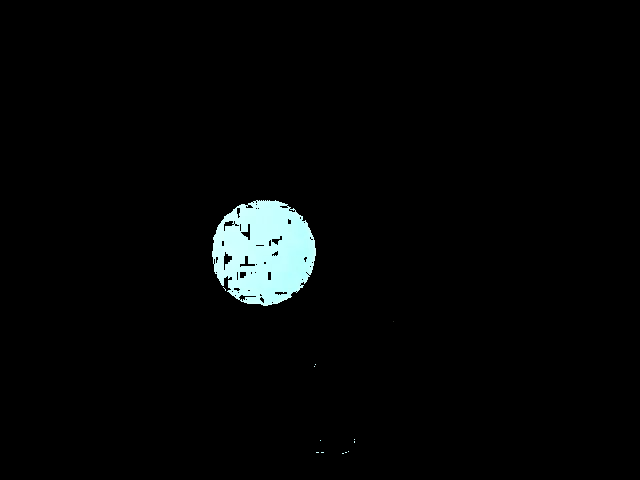

🔵 Blue Objects:


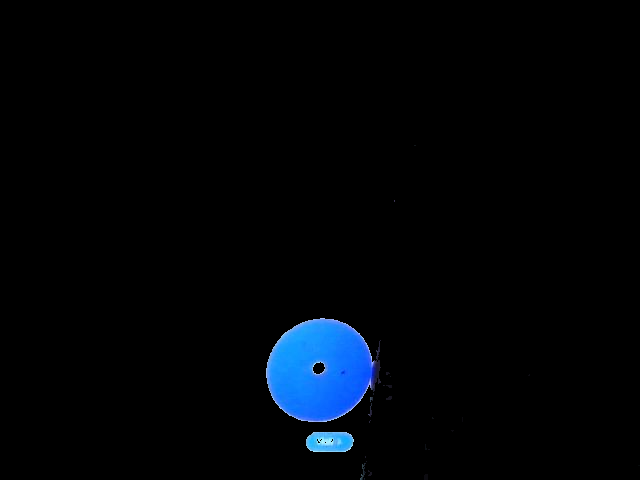

🎯 Final Result (Only Red, Green, Blue kept):


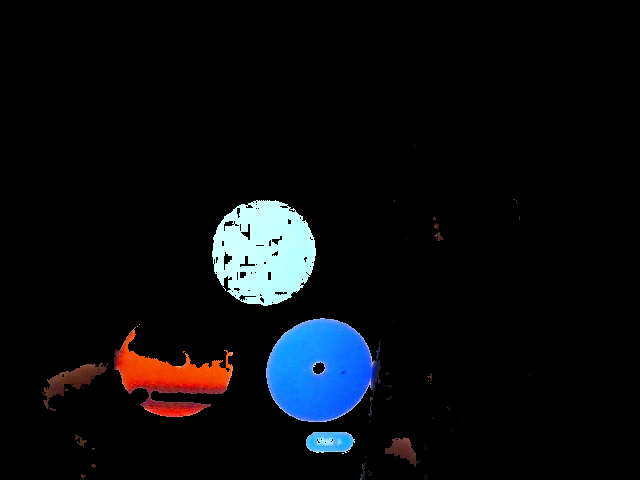

In [22]:
# ==============================
# OBJECT DETECTION BY COLOR (Red, Green, Blue) - COLAB
# ==============================

!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image

# ------------------------------
# Function to capture image from webcam in Colab
# ------------------------------
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for Capture button click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ------------------------------
# Capture Image
# ------------------------------
try:
    filename = take_photo()
    print("✅ Photo captured successfully!")
except Exception as e:
    print("❌ ERROR:", str(e))

# ------------------------------
# Detect Red, Green, Blue (ignore white)
# ------------------------------
frame = cv2.imread(filename)
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# --- Red color (two ranges since hue wraps)
low_red1 = np.array([0, 120, 70])
high_red1 = np.array([10, 255, 255])
low_red2 = np.array([170, 120, 70])
high_red2 = np.array([180, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red1, high_red1) + cv2.inRange(hsv_frame, low_red2, high_red2)
red = cv2.bitwise_and(frame, frame, mask=red_mask)

# --- Green
low_green = np.array([40, 40, 40])
high_green = np.array([90, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(frame, frame, mask=green_mask)

# --- Blue
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(frame, frame, mask=blue_mask)

# --- Combine all colors (ignore white areas)
combined_mask = red_mask | green_mask | blue_mask
result = cv2.bitwise_and(frame, frame, mask=combined_mask)

# ------------------------------
# Convert to RGB for display
# ------------------------------
original_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
red_rgb = cv2.cvtColor(red, cv2.COLOR_BGR2RGB)
green_rgb = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
blue_rgb = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# ------------------------------
# Display results
# ------------------------------
print("📷 Original Image:")
display(PIL.Image.fromarray(original_rgb))

print("🔴 Red Objects:")
display(PIL.Image.fromarray(red_rgb))

print("🟢 Green Objects:")
display(PIL.Image.fromarray(green_rgb))

print("🔵 Blue Objects:")
display(PIL.Image.fromarray(blue_rgb))

print("🎯 Final Result (Only Red, Green, Blue kept):")
display(PIL.Image.fromarray(result_rgb))


# Frontend code

<IPython.core.display.Javascript object>

✅ Photo captured successfully!


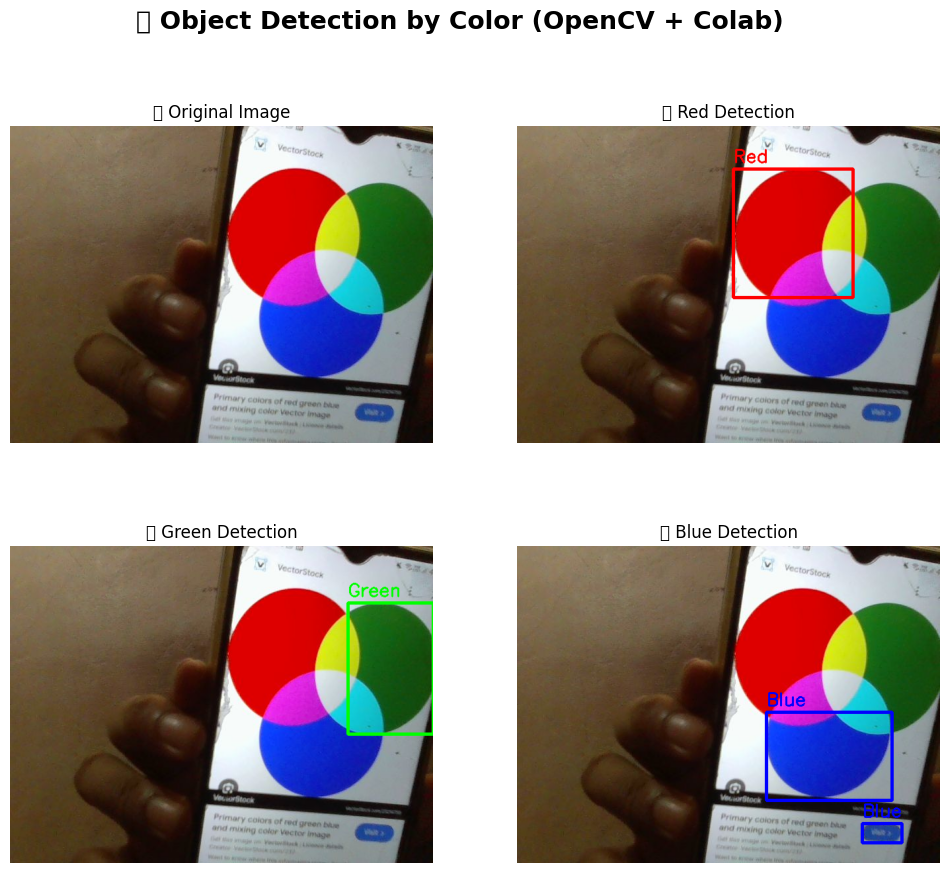

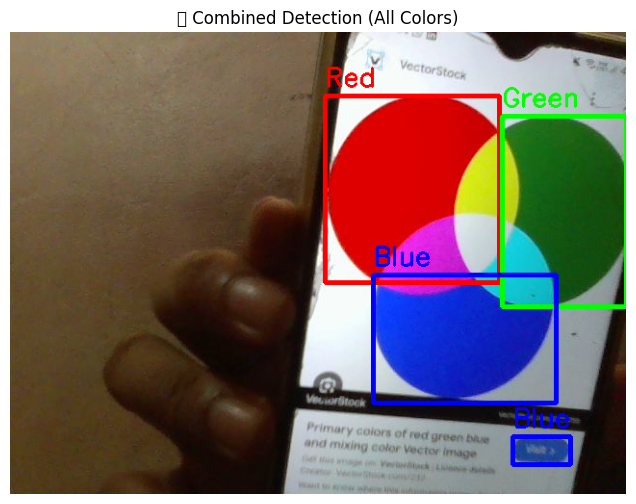

In [28]:
# ==============================
# OBJECT DETECTION USING COLORS (RED, GREEN, BLUE) - COLAB FRONTEND
# ==============================

!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import matplotlib.pyplot as plt

# ------------------------------
# Helper function: Capture Image
# ------------------------------
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        capture.style.fontSize = '20px';
        capture.style.padding = '10px';
        capture.style.margin = '10px';
        capture.style.background = '#4CAF50';
        capture.style.color = 'white';
        capture.style.border = 'none';
        capture.style.borderRadius = '8px';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        video.style.marginTop = '10px';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for Capture button click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ------------------------------
# Capture Image
# ------------------------------
try:
    filename = take_photo()
    print("✅ Photo captured successfully!")
except Exception as e:
    print("❌ ERROR:", str(e))

# ------------------------------
# Load Image and Convert to HSV
# ------------------------------
frame = cv2.imread(filename)
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# ------------------------------
# Define Color Ranges
# ------------------------------

# 🔴 Red (two ranges because hue wraps around)
low_red1 = np.array([0, 120, 70])
high_red1 = np.array([10, 255, 255])
low_red2 = np.array([170, 120, 70])
high_red2 = np.array([180, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red1, high_red1) + cv2.inRange(hsv_frame, low_red2, high_red2)

# 🔵 Blue
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)

# 🟢 Green
low_green = np.array([40, 40, 40])
high_green = np.array([90, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)

# ------------------------------
# Function: Detect Objects with Bounding Boxes
# ------------------------------
def detect_and_draw(frame, mask, color_name, box_color):
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    output = frame.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # ignore small noise
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(output, (x, y), (x+w, y+h), box_color, 3)
            cv2.putText(output, color_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)
    return output

# Detect all colors
red_detected = detect_and_draw(frame, red_mask, "Red", (0,0,255))
green_detected = detect_and_draw(frame, green_mask, "Green", (0,255,0))
blue_detected = detect_and_draw(frame, blue_mask, "Blue", (255,0,0))

# Combine detection
combined = frame.copy()
combined = detect_and_draw(combined, red_mask, "Red", (0,0,255))
combined = detect_and_draw(combined, green_mask, "Green", (0,255,0))
combined = detect_and_draw(combined, blue_mask, "Blue", (255,0,0))

# ------------------------------
# Display Results (Beautiful Grid)
# ------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("🎨 Object Detection by Color (OpenCV + Colab)", fontsize=18, fontweight="bold")

axes[0,0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
axes[0,0].set_title("📷 Original Image")
axes[0,0].axis("off")

axes[0,1].imshow(cv2.cvtColor(red_detected, cv2.COLOR_BGR2RGB))
axes[0,1].set_title("🔴 Red Detection")
axes[0,1].axis("off")

axes[1,0].imshow(cv2.cvtColor(green_detected, cv2.COLOR_BGR2RGB))
axes[1,0].set_title("🟢 Green Detection")
axes[1,0].axis("off")

axes[1,1].imshow(cv2.cvtColor(blue_detected, cv2.COLOR_BGR2RGB))
axes[1,1].set_title("🔵 Blue Detection")
axes[1,1].axis("off")

plt.show()

# Show combined detection
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("✨ Combined Detection (All Colors)")
plt.axis("off")
plt.show()


# Gradio ui frontend

In [29]:
# ==============================
# OBJECT DETECTION USING OPENCV + GRADIO UI
# ==============================

!pip install gradio opencv-python-headless

import cv2
import numpy as np
import gradio as gr

# ------------------------------
# Define Color Ranges
# ------------------------------

# Red (two ranges because hue wraps around)
low_red1 = np.array([0, 120, 70])
high_red1 = np.array([10, 255, 255])
low_red2 = np.array([170, 120, 70])
high_red2 = np.array([180, 255, 255])

# Blue
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])

# Green
low_green = np.array([40, 40, 40])
high_green = np.array([90, 255, 255])


# ------------------------------
# Function: Detect Objects
# ------------------------------
def detect_and_draw(frame, mask, color_name, box_color):
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    output = frame.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # filter small noise
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(output, (x, y), (x+w, y+h), box_color, 3)
            cv2.putText(output, color_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)
    return output


# ------------------------------
# Gradio Processing Function
# ------------------------------
def process_image(image, mode):
    frame = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Masks
    red_mask = cv2.inRange(hsv_frame, low_red1, high_red1) + cv2.inRange(hsv_frame, low_red2, high_red2)
    blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
    green_mask = cv2.inRange(hsv_frame, low_green, high_green)

    if mode == "Red":
        result = detect_and_draw(frame, red_mask, "Red", (0, 0, 255))
    elif mode == "Green":
        result = detect_and_draw(frame, green_mask, "Green", (0, 255, 0))
    elif mode == "Blue":
        result = detect_and_draw(frame, blue_mask, "Blue", (255, 0, 0))
    elif mode == "All Colors":
        result = frame.copy()
        result = detect_and_draw(result, red_mask, "Red", (0, 0, 255))
        result = detect_and_draw(result, green_mask, "Green", (0, 255, 0))
        result = detect_and_draw(result, blue_mask, "Blue", (255, 0, 0))
    else:
        result = frame

    return cv2.cvtColor(result, cv2.COLOR_BGR2RGB)


# ------------------------------
# Gradio UI
# ------------------------------
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## 🎨 Object Detection by Color (OpenCV + Gradio)\nUpload an image or take a photo, and detect **Red, Green, Blue** objects with bounding boxes.")

    with gr.Row():
        with gr.Column():
            input_img = gr.Image(type="numpy", label="Upload / Capture Image")
            color_choice = gr.Radio(
                ["Red", "Green", "Blue", "All Colors"],
                value="All Colors",
                label="Choose Detection Mode"
            )
            btn = gr.Button("🚀 Detect Objects")
        with gr.Column():
            output_img = gr.Image(type="numpy", label="Detection Result")

    btn.click(process_image, inputs=[input_img, color_choice], outputs=output_img)

# ------------------------------
# Launch Gradio
# ------------------------------
demo.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://518e38ac95361928a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://518e38ac95361928a7.gradio.live
